## Table of Contents

- Introduction
- Business Problem
- Objectives
- Data Understanding
- Data Preparation

## 1. INTRODUCTION

### In the telecommunications industry , alot of factors contributre to customer churn. SAome of the factors include, quality of service provison,  customer  service effectivceness, and competion from service providers. Employing predictive models such as logistice regression  and decission trees can enhance the sevice providers to easily anticipate churt and  put in place measures to conteract loss of clients.

## 2. BUSINESS PROBLEM

#### Customer retention is one of the key factor in  growth sustenance for any telecomunication  firm. Therefore customer churn; a phenomena whereby a customer stops to utilize  company services,stands to be one of   greatest threat for any telecomunications firm. This study  explores predictive analysis to explore various factors contributing to customer churn. As well as employing data-driven approach to predict likelihood of customers churn based on various characteristics.

## 3. OBJECTIVES

#### 1. Understand the customer churn rate

#### 2. Identify the most influential factors contributing to customer churn

#### 3. Develop a predictive model that can accurately predict the likelihood of customers churn based on their past behavior and characteristics.



## 4. DATA UNDERSTANDING

#### The dataset used in this study is from Kaggle, https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets. The dataset contains 3333 observations with 20 variables. The variables include:

#### **State:** Categorical variable indicating the customer's state.
#### **Account length:** Numeric variable indicating the length of the customer account.
#### **Area code:** Numeric variable indicating the area code of the
#### **Phone number:** Categorical variable (likely to be excluded as it won't contribute to churn prediction).
#### **International plan:**  Categorical variable indicating if the customer has an international plan.
#### **Voice mail plan:** Categorical variable indicating if the customer has a voicemail plan.
#### **Number vmail messages:** Numeric variable indicating the number of voicemail messages.
#### **Total day/eve/night/intl minutes:** Numeric variables indicating usage minutes in various time segments.
#### **Total day/eve/night/intl calls:** Numeric variables indicating the number of calls in various time segments.
#### **Total night minutes:** Numeric variables indicating usage minutes in various time segments.
#### **Total day/eve/night/intl charge:** Numeric variables indicating charges in various time segments.
#### **Customer service calls:** Numeric variable indicating the number of customer service calls made by the customer.
#### **Churn:** Binary target variable indicating customer churn (True/False).

#### The variables in the dataset will enable us to explore connection between various customer preferences/behaviours  and churn.


## 5. DATA PREPARATION

#### **Importing  Packages**

In [70]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

#### **EXPLORATORY DATA ANALYSIS**

**Loading Data**

In [71]:
import pandas as pd
df= pd.read_csv("Data/bigml_59c28831336c6604c800002a.csv", index_col=0)
print(df.head())
print("--------------------")
print(df.shape)

       account length  area code phone number international plan  \
state                                                              
KS                128        415     382-4657                 no   
OH                107        415     371-7191                 no   
NJ                137        415     358-1921                 no   
OH                 84        408     375-9999                yes   
OK                 75        415     330-6626                yes   

      voice mail plan  number vmail messages  total day minutes  \
state                                                             
KS                yes                     25              265.1   
OH                yes                     26              161.6   
NJ                 no                      0              243.4   
OH                 no                      0              299.4   
OK                 no                      0              166.7   

       total day calls  total day charge  total eve m

In [72]:
#drop the hone number column
df.drop("phone number",axis=1,inplace=True)

**Checking for Missing values**

The data set contains no missing values 

In [73]:
df.isna().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Exploring Churn rates**

3333
483
--------------------------
churn rate: 14.491449144914492


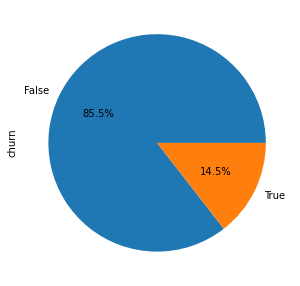

In [74]:
Total_entries = df["churn"].count()
churn = df["churn"].value_counts()[1]
print(Total_entries)
print(churn)
print("--------------------------")
print('churn rate:',(churn/Total_entries)*100)
Plot = df["churn"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(5,5))


In [87]:
#total revenue brought in by customers
df["total charge"]=df["total day charge"]+ df["total eve charge"]+ df["total night charge"]+ df["total intl charge"]
Total_Revenue = df["total charge"].sum()
Total_revenue_per_churn_status=total_charge_brought_in_by_customers.groupby(df["churn"]).sum()
print(Charge_per_churn_status)
Percentage_revenue_loss = Total_revenue_per_churn_status[1]/Total_Revenue
print("-----------------------------------------")
print(" With the presented churn rate of 14%, the syriatel company is bound to loss, " + str(round(Percentage_revenue_loss*100,2)) +"%"+ " of the revenue.")

churn
False    166579.10
True      31566.93
Name: total charge, dtype: float64
-----------------------------------------
 With the presented churn rate of 14%, the syriatel company is bound to loss, 15.93% of the revenue.


 **Checking Data Types**

 This in necessary to guide us on the best way process data for modelling.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   float6

**Defining X and Y variables**

In this case Churn  is the target varibales while all the other variables besides, phone_number serve as the predictors in our modelling process.

In [ ]:
X=df.drop("churn",axis=1)
y=df["churn"]

**Performing test train split**

This ensures that our model is trained on a representative sample of the data and evaluated on a different, unseen sample. This helps to prevent data leakage and overfitting for optimal performance of our model.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

**Correlation Analysis**

Could there be fetures that are highly realted to the variable "Churn",a correlation Matrix in necessary just to point out features with the highest correlation.

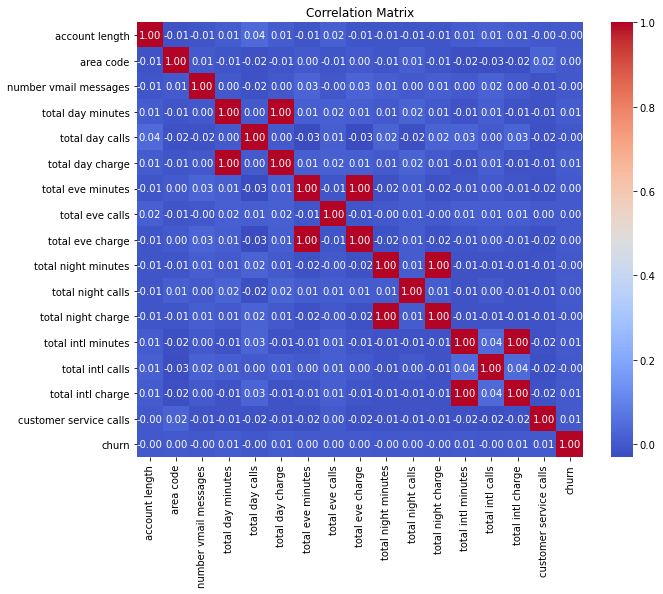

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 6. PREPROCESSING

 **Selecting categorical variables**

In [90]:
X_train_cat = X_train.select_dtypes(include="object")
X_train_num = X_train.select_dtypes(exclude="object")
X_test_cat = X_test.select_dtypes(include="object")
X_test_num = X_test.select_dtypes(exclude="object")

**One hot encoding**

In [ ]:
Ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_cat_ohe =Ohe.fit_transform(X_train_cat)
X_test_cat_ohe =Ohe.transform(X_test_cat)

**Creating Dataframes**

In [ ]:
X_train_cat_ohe_df= pd.DataFrame(X_train_cat_ohe, index=X_train_cat.index,columns= np.hstack(Ohe.categories_))
X_test_cat_ohe_df= pd.DataFrame(X_test_cat_ohe, index=X_test_cat.index,columns= np.hstack(Ohe.categories_))
X_train_cat_ohe_df.head()
X_test_cat_ohe_df.head()

,no,yes,no,yes
state,,,,
WY,1.0,0.0,1.0,0.0
IL,1.0,0.0,1.0,0.0
SD,1.0,0.0,1.0,0.0
KY,1.0,0.0,1.0,0.0
WY,1.0,0.0,1.0,0.0


**Scaling the Numeric Variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
X_train_num_scaled= Scaler.fit_transform(X_train_num)
X_test_num_scaled = Scaler.transform(X_test_num)


**Creating Final X_train Dataset**
- This step involves converting the both scaled and encoded data iinto dataframes to enable merging and creation of the final x_train dataset for modelling purposes

In [ ]:
X_train_cat_ohe_df= pd.DataFrame(X_train_cat_ohe, index=X_train_cat.index,columns= np.hstack(Ohe.categories_))
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, index=X_train_num.index, columns=X_train_num.columns)
X_test_cat_ohe_df= pd.DataFrame(X_test_cat_ohe, index=X_test_cat.index,columns= np.hstack(Ohe.categories_))
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, index=X_test_num.index, columns=X_test_num.columns)
X_train_final_df = pd.concat([X_train_num, X_train_cat_ohe_df], axis=1)
X_test_final_df = pd.concat([X_test_num, X_test_cat_ohe_df], axis=1)
print(X_train_final_df.shape)
print(X_test_final_df.shape)

#print (X_train_cat_ohe_df.shape)
#print(X_train_num_scaled_df.shape)
#X_train_final_df = pd.concat([X_train_num, X_train_cat_ohe_df], axis=1)
#print(X_train_final_df.shape)
#drop the second row
#X_train_final_df.drop(X_train_final_df.index[1], inplace=True)
#_train_final_df.head()


(1666, 20)
(1667, 20)


#### 7. MODELLING

**Fitting the baseline  logistic regression model**

This step involves creating a model that uses the logistic regression algorithm to predict Churn among the telcom cleints. first we define/instantiate the model and then fit the training data.


In [ ]:
#Instantiate the model
LogisticRegressionModel = LogisticRegression(fit_intercept=False, solver= 'liblinear',max_iter=2000)
#Fit the model
Baseline_model = LogisticRegressionModel.fit(X_train_final_df, y_train)

**Prediction**

This step involves making predictions on the test data using the model that we just trained.

In [ ]:
y_train_pred = Baseline_model.predict(X_train_final_df)
y_test_pred = Baseline_model.predict(X_test_final_df)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Train precision: %.3f' % precision_score(y_train, y_train_pred))
print('Test precision: %.3f' % precision_score(y_test, y_test_pred))


print("-------------------------------------------")
print('Train recall: %.3f' % recall_score(y_train, y_train_pred))
print('Test recall: %.3f' % recall_score(y_test, y_test_pred))

print("-------------------------------------------")
print('Train accuracy: %.3f' % accuracy_score(y_train, y_train_pred))
print('Test accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

print("-------------------------------------------")
print('Train f1: %.3f' % f1_score(y_train, y_train_pred))
print('Test f1: %.3f' % f1_score(y_test, y_test_pred))


Train precision: 0.568
Test precision: 0.579
-------------------------------------------
Train recall: 0.180
Test recall: 0.176
-------------------------------------------
Train accuracy: 0.866
Test accuracy: 0.857
-------------------------------------------
Train f1: 0.274
Test f1: 0.270


**Conducting SMOTE**

The baseline Model shows  high  accuracy levels but has relatively low precisions. This is shows presence of class imbalance in our dataset.
There is need to encode the data  before conducting SMOTE as this type of resampling requires numeric variables.

In [ ]:
#encoding the data before smote
X_train_dm = pd.get_dummies(X_train, drop_first=True)
X_test_dm = pd.get_dummies(X_test, drop_first=True)


In [ ]:
#aplying SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_dm, y_train)

print(y_train_res.value_counts())
print("-----------------")
print(y_train.value_counts())




True     1433
False    1433
Name: churn, dtype: int64
-----------------
False    1433
True      233
Name: churn, dtype: int64


In [ ]:
#fiting the model
LogisticRegressionModel = LogisticRegression(fit_intercept=False, solver= 'liblinear',max_iter=2000)
smote_model = LogisticRegressionModel.fit(X_train_res, y_train_res)
y_train_pred_sm = smote_model.predict(X_train_res)
y_test_pred_sm= smote_model.predict(X_test_dm)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Train precision: %.3f' % precision_score(y_train_res, y_train_pred_sm))
print('Test precision: %.3f' % precision_score(y_test, y_test_pred_sm))

print("-------------------------------------------")
print('Train recall: %.3f' % recall_score(y_train_res, y_train_pred_sm))
print('Test recall: %.3f' % recall_score(y_test, y_test_pred_sm))

print("-------------------------------------------")
print('Train accuracy: %.3f' % accuracy_score(y_train_res, y_train_pred_sm))
print('Test accuracy: %.3f' % accuracy_score(y_test, y_test_pred_sm))

print("-------------------------------------------")
print('Train f1: %.3f' % f1_score(y_train_res, y_train_pred_sm))
print('Test f1: %.3f' % f1_score(y_test, y_test_pred_sm))

Train precision: 0.709
Test precision: 0.324
-------------------------------------------
Train recall: 0.749
Test recall: 0.732
-------------------------------------------
Train accuracy: 0.721
Test accuracy: 0.731
-------------------------------------------
Train f1: 0.729
Test f1: 0.450


**Ridge and Lasso Regression Models**

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
Ridge_reg=Ridge(alpha=1.0)
Lasso_reg=Lasso(alpha=1.0)
Ridge_mod=Ridge_reg.fit(X_train_res, y_train_res)
Lasso_mod=Lasso_reg.fit(X_train_res, y_train_res)
y_train_pred_Ridge=Ridge_mod.predict(X_train_res)
y_test_pred_Ridge=Ridge_mod.predict(X_test_dm)
y_train_pred_Lasso=Lasso_mod.predict(X_train_res)
y_test_pred_Lasso=Lasso_mod.predict(X_test_dm)


In [ ]:
threshold = 0.5
y_train_pred_Ridge_binary = (y_train_pred_Ridge > threshold).astype(int)
y_test_pred_Ridge_binary = (y_test_pred_Ridge > threshold).astype(int)

In [ ]:
print('Ridge Train precision: %.3f' % precision_score(y_train_res, y_train_pred_Ridge_binary))
print('Ridge Test precision: %.3f' % precision_score(y_test, y_test_pred_Ridge_binary))

print("-------------------------------------------")
print('Ridge Train recall: %.3f' % recall_score(y_train_res, y_train_pred_Ridge_binary))
print('Ridge Test recall: %.3f' % recall_score(y_test, y_test_pred_Ridge_binary))

print("-------------------------------------------")
print('Ridge Train accuracy: %.3f' % accuracy_score(y_train_res, y_train_pred_Ridge_binary))
print('Ridge Test accuracy: %.3f' % accuracy_score(y_test, y_test_pred_Ridge_binary))

print("-------------------------------------------")
print('Ridge Train f1: %.3f' % f1_score(y_train_res, y_train_pred_Ridge_binary))
print('Ridge Test f1: %.3f' % f1_score(y_test, y_test_pred_Ridge_binary))

Ridge Train precision: 0.722
Ridge Test precision: 0.314
-------------------------------------------
Ridge Train recall: 0.767
Ridge Test recall: 0.724
-------------------------------------------
Ridge Train accuracy: 0.736
Ridge Test accuracy: 0.722
-------------------------------------------
Ridge Train f1: 0.744
Ridge Test f1: 0.438


In [ ]:
threshold = 0.5
y_train_pred_Lasso_binary = (y_train_pred_Ridge > threshold).astype(int)
y_test_pred_Lasso_binary = (y_test_pred_Ridge > threshold).astype(int)

print('Lasso Train precision: %.3f' % precision_score(y_train_res, y_train_pred_Lasso_binary))
print('Lasso Test precision: %.3f' % precision_score(y_test, y_test_pred_Lasso_binary))

print("-------------------------------------------")
print('Lasso Train recall: %.3f' % recall_score(y_train_res, y_train_pred_Lasso_binary))
print('Lasso Test recall: %.3f' % recall_score(y_test, y_test_pred_Lasso_binary))

print("-------------------------------------------")
print('Lasso Train accuracy: %.3f' % accuracy_score(y_train_res, y_train_pred_Lasso_binary))
print('Lasso Test accuracy: %.3f' % accuracy_score(y_test, y_test_pred_Lasso_binary))

print("-------------------------------------------")
print('Lasso Train f1: %.3f' % f1_score(y_train_res, y_train_pred_Lasso_binary))
print('Lasso Test f1: %.3f' % f1_score(y_test, y_test_pred_Lasso_binary))

Lasso Train precision: 0.722
Lasso Test precision: 0.314
-------------------------------------------
Lasso Train recall: 0.767
Lasso Test recall: 0.724
-------------------------------------------
Lasso Train accuracy: 0.736
Lasso Test accuracy: 0.722
-------------------------------------------
Lasso Train f1: 0.744
Lasso Test f1: 0.438


**Decision Tree Fitting**

This step involves fitting a decision tree on the resampled data; i.e there is no class imbalance. This will enable us choose the best prediction model as well as strategy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,min_samples_leaf=5,max_depth=3)
classifier.fit(X_train_res, y_train_res)
#accuracy for the training set
y_pred_train_dt=classifier.predict(X_train_res)
print("Accuracy for train is",accuracy_score(y_train_res,y_pred_train_dt)*100)

#Predicting the Test set results
y_pred_test_dt=classifier.predict(X_test_dm)
print("Accuracy for test is",accuracy_score(y_test,y_pred_test_dt)*100)



Accuracy for train is 71.38869504535938
Accuracy for test is 90.1619676064787


<AxesSubplot:>

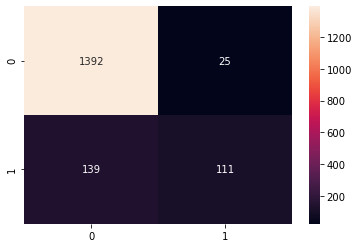

In [92]:
#Fitting a confusion Matrix for the de
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test_dt)
#plotting the confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred_test_dt),annot=True,fmt='d')


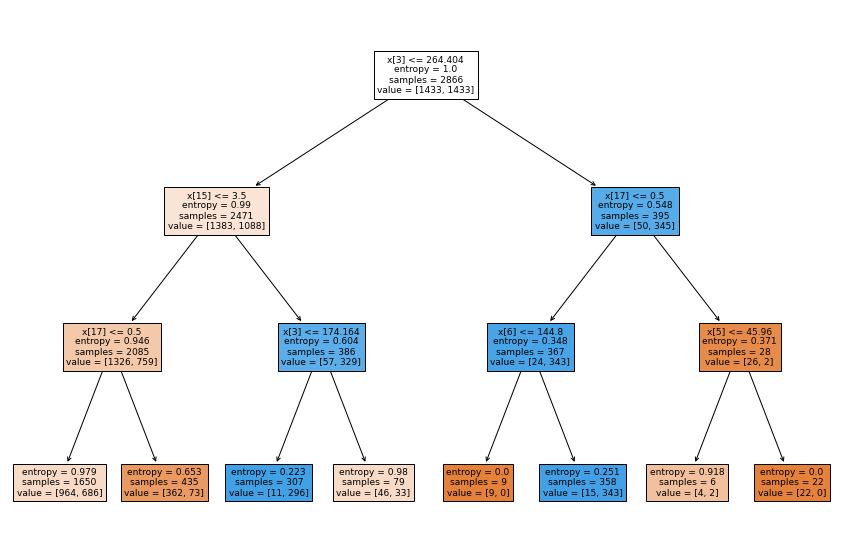

In [ ]:
#plotting the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)
plt.show()

#### 8. EVALUATION

## Performance Metrics of the baseline model performance

**Below is a brief description of the evaluation metrics of the baseline model:**

**Precision: Train: 0.568, Test: 0.579**

The precision values for both the train and test sets are similar, which suggests that the model has a consistent rate of correctly identifying positive instances across both sets. However, the precision is relatively low, indicating that a significant number of predicted positives are actually false positives.

**Recall: Train: 0.180 Test: 0.176**

The recall values are quite low for both train and test sets, which means the model is missing a large number of actual positive instances. This might suggest that the model is not very sensitive and is underfitting the positive class.

**Accuracy: Train: 0.866 Test: 0.857**

The accuracy is relatively high, but this might be misleading if the dataset is imbalanced (i.e., there are many more negatives than positives). High accuracy in such cases could simply reflect the model's ability to predict the majority class correctly.

**F1 Score: Train: 0.274 Test: 0.270**

The F1 score, which is the harmonic mean of precision and recall, is quite low for both train and test sets. This indicates a poor balance between precision and recall, reflecting overall weak performance in identifying the positive class.

## Performance Metrics of  Second Model  After Solving Class Imbalance with  SMOTE

**Precision: Train Precision: 0.709, Test Precision: 0.324**

Precision on the training data is high, but it drops significantly on the test data. This suggests that while the model performs well in identifying positive instances during training, it struggles to maintain this performance on unseen data. This drop in precision could be due to overfitting.

**Recall: Train Recall: 0.749, Test Recall: 0.732**

Recall is relatively consistent between training and testing. This means the model is fairly good at identifying positive instances across both datasets, although it might not capture all possible positive cases.

**Accuracy: Train Accuracy: 0.721, Test Accuracy: 0.731**

Accuracy is fairly similar for both training and testing, which is a good sign.

**F1 Score: Train F1: 0.729, Test F1: 0.450**

The F1 score, which balances precision and recall, is much lower on the test data compared to the training data. This indicates that the model might be performing well on precision and recall during training but is not generalizing well to new data.

In summary, the Evaluation Metrics seem to be performing well on training data but not very well on the test data. This suggests overfitting and need to regularrize the model 

## **Performance Metrics of  Ridge and Lasso Models**

 The model evaluation Metrics for both lasso and ridge models seem constant the Log_reg model trained asfter conducting SMOTE. We therefore condlude that the second model is the best we have for predicting Churn among the Syria Tel Customers.



## **Performance Metrics of the Decision Tree** 

The Decision Tree model performs well on both the training with an accuracy of 71% and testing data, with a high accuracy score of 91%. This suggests that the model is not overfitting the data and can generalize well to new, unseen data. This makes it the most accurate prediction model for the syriatel data.

### 9. CONCLUSIONS

The results of this analysis show that SyriaTel has a significant customer churn rate of approximately 14%. This is a significant issue, as it results in a loss of approximately 15% of revenue. To address this issue, the following recommendations have been made:

#### **Objective 1 :** Understand the customer churn rate

The SyriaTel customer churn rate is approximately 14%, which means that out of every 100 customers, 14 are expected to leave the company. ind addition, the 14% churn rate is approximately results to 15% of revenue loss. This is a significant number and  there is need for      immediate attention to improve customer retention.

#### **Objective 2 :** Identify the most influential factors contributing to customer churn

From the correlation matrix, its evident that the variables available have less correlation to the variable churn. There is need  for collecting data that is more client centred so as to explore characteristics of clients who are likely to be lost for  remediation purposes


#### **Objective 3 :** Develop a predictive model that can accurately predict the likelihood of customers churn based on their past behavior and characteristics.

The decision Tree model stands out to be one of the most accurate model tpo predict customers churn. the model has accuracy of 71% on training data and 91% on the test data.

The second model, which is a Ridge Regression model trained on SMOTE data, has the best performance metrics and is the most accurate for predicting customer churn among the Syria Tel Customers. The model has a precision of 0.709, a recall of 0.749, and a F1 score of 0.729 on the test data. This indicates that the model is capable of identifying customers who are most likely to churn.






#### 10. RECOMENDATIONS

The results of this analysis show that SyriaTel has a significant customer churn rate of approximately 14%. This is a significant issue, as it results in a loss of approximately 15% of revenue. To address this issue, the following recommendations have been made:

1. Identify the most influential factors contributing to customer churn from the correlation matrix. There is need for collecting data that is more client_centred so as to explore characteristics of clients who are likely to be lost for remediation purposes. include variables such as gender, age, customers subsription  tenure etc

2. Based on the results, we recommend the use of a Decision Tree model for predicting customer churn. This model has a high accuracy score, making it a reliable choice for this specific problem. The model can be fine-tuned and regularized to improve its performance. Additionally, the collected data should be more client_centred to provide more accurate and relevant insights for identifying the most influential factors contributing to customer churn.


